# Clasificación con data de hundimiento del Titanic

In [1]:
import findspark
findspark.init()

In [2]:
from pyspark.sql import SparkSession
spark = (
    SparkSession.builder
    .appName("pyspark-titanic-sol")
    .config("spark.driver.memory", "512m")
    .config("spark.driver.cores", "1")
    .config("spark.executor.memory", "512m")
    .config("spark.executor.cores", "1")
    .config("spark.sql.shuffle.partitions", "2")
    .getOrCreate()
)

In [3]:
spark.version

'2.4.5'

In [4]:
dft = spark.read.csv('/dataset/titanic.csv', header=True)

In [5]:
dft.show(10)

+------+--------+--------------------+------+----+-----+-----+--------+--------+-------+--------+----+-----+--------------------+
|pclass|survived|                name|   sex| age|sibsp|parch|  ticket|    fare|  cabin|embarked|boat| body|           home.dest|
+------+--------+--------------------+------+----+-----+-----+--------+--------+-------+--------+----+-----+--------------------+
|     1|       1|Allen, Miss. Elis...|female|29.0|    0|    0|   24160|211.3375|     B5|       S|   2| null|        St Louis, MO|
|     1|       1|Allison, Master. ...|  male|0.92|    1|    2|  113781|  151.55|C22 C26|       S|  11| null|Montreal, PQ / Ch...|
|     1|       0|Allison, Miss. He...|female| 2.0|    1|    2|  113781|  151.55|C22 C26|       S|null| null|Montreal, PQ / Ch...|
|     1|       0|Allison, Mr. Huds...|  male|30.0|    1|    2|  113781|  151.55|C22 C26|       S|null|135.0|Montreal, PQ / Ch...|
|     1|       0|Allison, Mrs. Hud...|female|25.0|    1|    2|  113781|  151.55|C22 C26|  

In [6]:
dft.printSchema()

root
 |-- pclass: string (nullable = true)
 |-- survived: string (nullable = true)
 |-- name: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- age: string (nullable = true)
 |-- sibsp: string (nullable = true)
 |-- parch: string (nullable = true)
 |-- ticket: string (nullable = true)
 |-- fare: string (nullable = true)
 |-- cabin: string (nullable = true)
 |-- embarked: string (nullable = true)
 |-- boat: string (nullable = true)
 |-- body: string (nullable = true)
 |-- home.dest: string (nullable = true)



In [7]:
from pyspark.sql.types import DoubleType, IntegerType

In [8]:
dft = dft.withColumn('survived', dft['survived'].cast(IntegerType()))

In [9]:
dft.printSchema()

root
 |-- pclass: string (nullable = true)
 |-- survived: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- age: string (nullable = true)
 |-- sibsp: string (nullable = true)
 |-- parch: string (nullable = true)
 |-- ticket: string (nullable = true)
 |-- fare: string (nullable = true)
 |-- cabin: string (nullable = true)
 |-- embarked: string (nullable = true)
 |-- boat: string (nullable = true)
 |-- body: string (nullable = true)
 |-- home.dest: string (nullable = true)



In [10]:
dft.select('survived').show(5)

+--------+
|survived|
+--------+
|       1|
|       1|
|       0|
|       0|
|       0|
+--------+
only showing top 5 rows



In [11]:
dft.groupBy('survived').count().orderBy('count').show(10)

+--------+-----+
|survived|count|
+--------+-----+
|       1|  500|
|       0|  809|
+--------+-----+



In [12]:
dft.count()

1309

## Extraccion (Ejercicio 1)

In [13]:
from pathlib import Path
import pandas as pd

In [14]:
def extract_titanic_data(url, refresh_cache=False):
    cache_fn = Path('/dataset/titanic_local.csv')
    if not cache_fn.exists() or refresh_cache:
        print("Getting data")
        df = pd.read_csv(url)
        df.to_csv(cache_fn, index=False)
    print("Using cache")
    df = spark.read.csv(str(cache_fn), header=True)
    return df

In [15]:
url = 'https://gist.githubusercontent.com/petobens/29825af615da09752c2817e96732215a/raw/5ad193b26e8a2b79220028f0f1520a2d868ab28e/titanic.csv'

In [16]:
df_raw = extract_titanic_data(url)

Using cache


In [17]:
type(df_raw)

pyspark.sql.dataframe.DataFrame

In [18]:
df_raw.show(10)

+------+--------+--------------------+------+----+-----+-----+--------+--------+-------+--------+----+-----+--------------------+
|pclass|survived|                name|   sex| age|sibsp|parch|  ticket|    fare|  cabin|embarked|boat| body|           home.dest|
+------+--------+--------------------+------+----+-----+-----+--------+--------+-------+--------+----+-----+--------------------+
|     1|       1|Allen, Miss. Elis...|female|29.0|    0|    0|   24160|211.3375|     B5|       S|   2| null|        St Louis, MO|
|     1|       1|Allison, Master. ...|  male|0.92|    1|    2|  113781|  151.55|C22 C26|       S|  11| null|Montreal, PQ / Ch...|
|     1|       0|Allison, Miss. He...|female| 2.0|    1|    2|  113781|  151.55|C22 C26|       S|null| null|Montreal, PQ / Ch...|
|     1|       0|Allison, Mr. Huds...|  male|30.0|    1|    2|  113781|  151.55|C22 C26|       S|null|135.0|Montreal, PQ / Ch...|
|     1|       0|Allison, Mrs. Hud...|female|25.0|    1|    2|  113781|  151.55|C22 C26|  

In [19]:
df_raw.printSchema()

root
 |-- pclass: string (nullable = true)
 |-- survived: string (nullable = true)
 |-- name: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- age: string (nullable = true)
 |-- sibsp: string (nullable = true)
 |-- parch: string (nullable = true)
 |-- ticket: string (nullable = true)
 |-- fare: string (nullable = true)
 |-- cabin: string (nullable = true)
 |-- embarked: string (nullable = true)
 |-- boat: string (nullable = true)
 |-- body: string (nullable = true)
 |-- home.dest: string (nullable = true)



In [20]:
# Rename home.dest column
df_raw = df_raw.withColumnRenamed('home.dest','home_dest')
df_raw.printSchema()

root
 |-- pclass: string (nullable = true)
 |-- survived: string (nullable = true)
 |-- name: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- age: string (nullable = true)
 |-- sibsp: string (nullable = true)
 |-- parch: string (nullable = true)
 |-- ticket: string (nullable = true)
 |-- fare: string (nullable = true)
 |-- cabin: string (nullable = true)
 |-- embarked: string (nullable = true)
 |-- boat: string (nullable = true)
 |-- body: string (nullable = true)
 |-- home_dest: string (nullable = true)



In [21]:
df_raw.count()

1309

In [22]:
# Train/test split
train_df, test_df = df_raw.randomSplit([0.7,0.3],seed=1234)

In [23]:
df_raw.randomSplit?

In [24]:
train_df.count()

959

In [25]:
from pyspark.sql.functions import rand, when
df_raw = df_raw.withColumn('train', when(rand(seed=1234) > 0.3, True).otherwise(False))

In [26]:
rand?

In [27]:
df_raw.select('train').groupby('train').count().show()

+-----+-----+
|train|count|
+-----+-----+
| true|  886|
|false|  423|
+-----+-----+



In [28]:
df_raw.select('train').printSchema()

root
 |-- train: boolean (nullable = false)



In [29]:
import pyspark.sql.functions as f

In [30]:
df_train = df_raw.filter(f.col('train') == True)

In [31]:
df_train.count()

886

In [32]:
df_test = df_raw.filter(f.col('train') != True)

In [33]:
df_test.count()

423

## Ejercicio 2: Primer preproceso / EDA

In [34]:
# Casteo de datos
df_raw.printSchema()

root
 |-- pclass: string (nullable = true)
 |-- survived: string (nullable = true)
 |-- name: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- age: string (nullable = true)
 |-- sibsp: string (nullable = true)
 |-- parch: string (nullable = true)
 |-- ticket: string (nullable = true)
 |-- fare: string (nullable = true)
 |-- cabin: string (nullable = true)
 |-- embarked: string (nullable = true)
 |-- boat: string (nullable = true)
 |-- body: string (nullable = true)
 |-- home_dest: string (nullable = true)
 |-- train: boolean (nullable = false)



In [35]:
def cast_cols(df, cols, new_type):
  for col in cols: 
     df = df.withColumn(col, df[col].cast(new_type()))
  return df

In [36]:
integer_cols = ['survived', 'sibsp', 'parch', 'body']
float_cols = ['age', 'fare']

In [37]:
df_raw = cast_cols(df_raw, integer_cols, IntegerType)
df_raw = cast_cols(df_raw, float_cols, DoubleType)

In [38]:
df_raw.printSchema()

root
 |-- pclass: string (nullable = true)
 |-- survived: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- age: double (nullable = true)
 |-- sibsp: integer (nullable = true)
 |-- parch: integer (nullable = true)
 |-- ticket: string (nullable = true)
 |-- fare: double (nullable = true)
 |-- cabin: string (nullable = true)
 |-- embarked: string (nullable = true)
 |-- boat: string (nullable = true)
 |-- body: integer (nullable = true)
 |-- home_dest: string (nullable = true)
 |-- train: boolean (nullable = false)



In [39]:
survived_on_boat = df_raw.filter((f.col('boat').isNotNull()) & (f.col('survived') == 1)).count()
survived = df_raw.filter(f.col('survived') == 1).count()
survived_on_boat / survived

0.954

In [40]:
import logging
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s-%(name)s-%(levelname)s: %(message)s',
    handlers=[logging.FileHandler('/dataset/titanic_spark.log'), logging.StreamHandler()],
)
logger = logging.getLogger(__name__)

In [41]:
def _drop_unusable_cols(df, cols=[]):
    logger.info(
        f"Dropping the following {len(cols)} unusable columns:\n"
        f"{cols}"
    )
    df = df.drop(*cols)
    logger.info(
        f"Remaining {len(df.columns)} columns:\n {sorted(df.columns)}"
    )
    return df

In [42]:
train_df = _drop_unusable_cols(train_df, cols=['boat', 'body', 'train'])

2022-10-25 20:49:42,935-__main__-INFO: Dropping the following 3 unusable columns:
['boat', 'body', 'train']
2022-10-25 20:49:42,962-__main__-INFO: Remaining 12 columns:
 ['age', 'cabin', 'embarked', 'fare', 'home_dest', 'name', 'parch', 'pclass', 'sex', 'sibsp', 'survived', 'ticket']


In [43]:
train_df.columns, test_df.columns

(['pclass',
  'survived',
  'name',
  'sex',
  'age',
  'sibsp',
  'parch',
  'ticket',
  'fare',
  'cabin',
  'embarked',
  'home_dest'],
 ['pclass',
  'survived',
  'name',
  'sex',
  'age',
  'sibsp',
  'parch',
  'ticket',
  'fare',
  'cabin',
  'embarked',
  'boat',
  'body',
  'home_dest'])

In [44]:
test_df = _drop_unusable_cols(test_df, cols=['boat', 'body', 'train'])

2022-10-25 20:49:46,647-__main__-INFO: Dropping the following 3 unusable columns:
['boat', 'body', 'train']
2022-10-25 20:49:46,661-__main__-INFO: Remaining 12 columns:
 ['age', 'cabin', 'embarked', 'fare', 'home_dest', 'name', 'parch', 'pclass', 'sex', 'sibsp', 'survived', 'ticket']


In [45]:
train_df = train_df.withColumn('train_new', f.lit(True))
test_df = test_df.withColumn('train_new', f.lit(False))

In [46]:
train_df

DataFrame[pclass: string, survived: string, name: string, sex: string, age: string, sibsp: string, parch: string, ticket: string, fare: string, cabin: string, embarked: string, home_dest: string, train_new: boolean]

In [47]:
joined_df = train_df.unionByName(test_df)
joined_df.count()

1309

In [48]:
joined_df

DataFrame[pclass: string, survived: string, name: string, sex: string, age: string, sibsp: string, parch: string, ticket: string, fare: string, cabin: string, embarked: string, home_dest: string, train_new: boolean]

In [49]:
df = _drop_unusable_cols(df_raw, cols=['boat', 'body', 'ticket'])

2022-10-25 20:49:55,535-__main__-INFO: Dropping the following 3 unusable columns:
['boat', 'body', 'ticket']
2022-10-25 20:49:55,547-__main__-INFO: Remaining 12 columns:
 ['age', 'cabin', 'embarked', 'fare', 'home_dest', 'name', 'parch', 'pclass', 'sex', 'sibsp', 'survived', 'train']


In [50]:
df.printSchema()

root
 |-- pclass: string (nullable = true)
 |-- survived: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- age: double (nullable = true)
 |-- sibsp: integer (nullable = true)
 |-- parch: integer (nullable = true)
 |-- fare: double (nullable = true)
 |-- cabin: string (nullable = true)
 |-- embarked: string (nullable = true)
 |-- home_dest: string (nullable = true)
 |-- train: boolean (nullable = false)



In [51]:
# Plotting
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
df.select('train').show(5)

+-----+
|train|
+-----+
| true|
| true|
| true|
| true|
| true|
+-----+
only showing top 5 rows



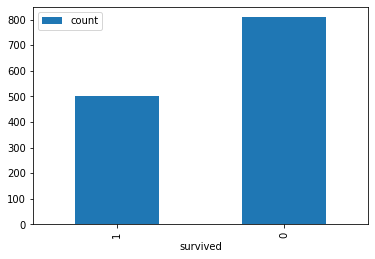

In [53]:
df.select('survived').groupBy('survived').count().toPandas().set_index('survived').plot.bar()

In [54]:
df.show(5)

+------+--------+--------------------+------+----+-----+-----+--------+-------+--------+--------------------+-----+
|pclass|survived|                name|   sex| age|sibsp|parch|    fare|  cabin|embarked|           home_dest|train|
+------+--------+--------------------+------+----+-----+-----+--------+-------+--------+--------------------+-----+
|     1|       1|Allen, Miss. Elis...|female|29.0|    0|    0|211.3375|     B5|       S|        St Louis, MO| true|
|     1|       1|Allison, Master. ...|  male|0.92|    1|    2|  151.55|C22 C26|       S|Montreal, PQ / Ch...| true|
|     1|       0|Allison, Miss. He...|female| 2.0|    1|    2|  151.55|C22 C26|       S|Montreal, PQ / Ch...| true|
|     1|       0|Allison, Mr. Huds...|  male|30.0|    1|    2|  151.55|C22 C26|       S|Montreal, PQ / Ch...| true|
|     1|       0|Allison, Mrs. Hud...|female|25.0|    1|    2|  151.55|C22 C26|       S|Montreal, PQ / Ch...| true|
+------+--------+--------------------+------+----+-----+-----+--------+-

## EDA y Ejercicio 3

In [55]:
import seaborn as sns

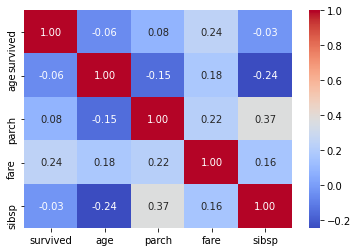

In [56]:
g = sns.heatmap(df.select('survived', 'age', 'parch', 'fare', 'sibsp').toPandas().corr(),
                annot=True, fmt = ".2f", cmap = "coolwarm")

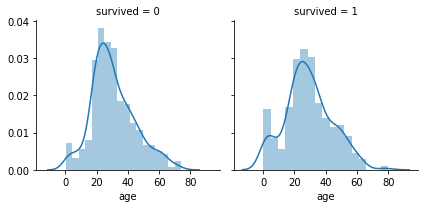

In [57]:
g = sns.FacetGrid(df.toPandas(), col='survived')
g = g.map(sns.distplot, 'age')

In [58]:
survived_age = df.filter((f.col('survived') == 1) & 
                         (f.col('age').isNotNull())).select('age').toPandas()
not_survived_age = df.filter((f.col('survived') == 0) & (f.col('age').isNotNull())).select('age').toPandas()

In [59]:
survived_age.squeeze()

0      29.00
1       0.92
2      48.00
3      63.00
4      53.00
       ...  
422    63.00
423    22.00
424    38.00
425    47.00
426    15.00
Name: age, Length: 427, dtype: float64

In [60]:
type(survived_age.squeeze())

pandas.core.series.Series

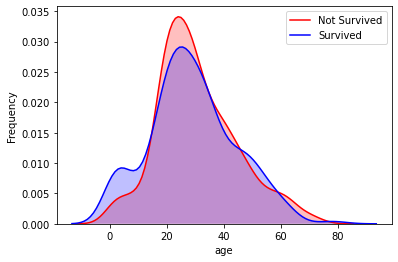

In [61]:
g = sns.kdeplot(not_survived_age.squeeze(), color='Red', shade=True)
g = sns.kdeplot(survived_age.squeeze(), color='Blue', shade=True)
g.set_xlabel('age')
g.set_ylabel('Frequency')
g.legend(['Not Survived', 'Survived'])

In [62]:
fare_mean = df.select(f.mean(f.col('fare'))).first()[0]
fare_mean

33.29547928134572

In [63]:
df.select('fare').fillna(fare_mean).filter(f.col('fare').isNull()).show()

+----+
|fare|
+----+
+----+



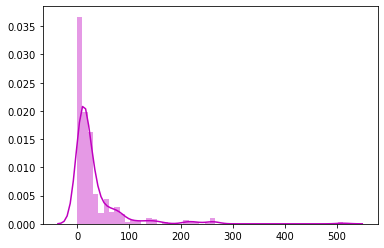

In [64]:
# Distribución de precio de boletos 
g = sns.distplot(df.select('fare').fillna(fare_mean).toPandas(), color='m')

In [65]:
df.select('fare').filter(f.col('fare') == 0).show()

+----+
|fare|
+----+
| 0.0|
| 0.0|
| 0.0|
| 0.0|
| 0.0|
| 0.0|
| 0.0|
| 0.0|
| 0.0|
| 0.0|
| 0.0|
| 0.0|
| 0.0|
| 0.0|
| 0.0|
| 0.0|
| 0.0|
+----+



In [66]:
import numpy as np

In [67]:
@f.udf('double')
def np_log(x):
    if x is None:
        return 0
    return float(np.log(x + 1)) 

In [68]:
df = df.withColumn('log_fare', np_log(df.fare))
df.select('fare', 'log_fare').show()

+--------+------------------+
|    fare|          log_fare|
+--------+------------------+
|211.3375|  5.35817698994543|
|  151.55| 5.027492411162679|
|  151.55| 5.027492411162679|
|  151.55| 5.027492411162679|
|  151.55| 5.027492411162679|
|   26.55|3.3160025355989236|
| 77.9583| 4.368919865004903|
|     0.0|               0.0|
| 51.4792| 3.960416900617205|
| 49.5042| 3.922056501139853|
| 227.525|5.4316456135398825|
| 227.525|5.4316456135398825|
|    69.3| 4.252771798816619|
|   78.85| 4.380149874661021|
|    30.0|3.4339872044851463|
|  25.925|3.2930552230424524|
|247.5208| 5.515526544247129|
|247.5208| 5.515526544247129|
| 76.2917| 4.347586575960343|
| 75.2417| 4.333908557103646|
+--------+------------------+
only showing top 20 rows



In [69]:
df = df.drop('fare')

In [70]:
df.select('age').groupBy('age').count().show()

+----+-----+
| age|count|
+----+-----+
|0.92|    2|
|0.17|    1|
|25.0|   34|
|63.0|    4|
|39.0|   20|
|53.0|    4|
|71.0|    2|
|null|  263|
|32.0|   24|
|36.0|   31|
|42.0|   18|
|19.0|   29|
|35.0|   23|
|45.0|   21|
|58.0|    6|
|22.0|   43|
|60.0|    7|
|33.0|   21|
|17.0|   20|
|14.0|    8|
+----+-----+
only showing top 20 rows



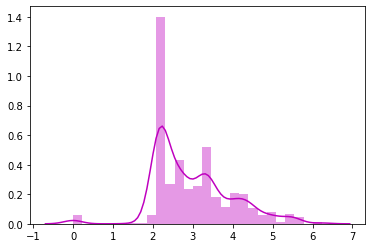

In [71]:
g = sns.distplot(df.select('log_fare').fillna(np.log(fare_mean)).toPandas(), color='m')

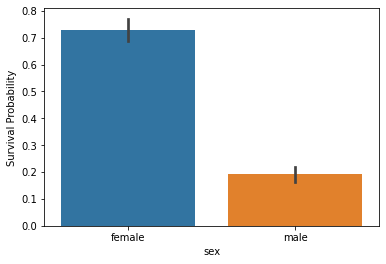

In [72]:
g = sns.barplot(x='sex', y='survived', data=df.toPandas())
g = g.set_ylabel("Survival Probability")

In [73]:
df.select('sex', 'survived').groupby('sex').mean().show()

+------+-------------------+
|   sex|      avg(survived)|
+------+-------------------+
|female| 0.7274678111587983|
|  male|0.19098457888493475|
+------+-------------------+



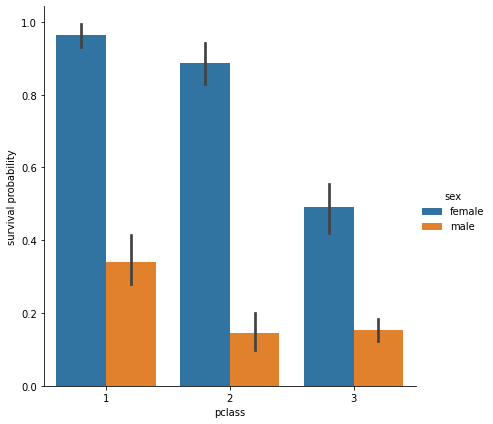

In [74]:
g = sns.catplot(x='pclass', y='survived', hue='sex', data=df.toPandas(),
                   height=6, kind='bar')
g = g.set_ylabels("survival probability")

## Ejercicio 4: Valores nulos y constantes

In [75]:
type(df)

pyspark.sql.dataframe.DataFrame

In [76]:
df.printSchema()

root
 |-- pclass: string (nullable = true)
 |-- survived: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- age: double (nullable = true)
 |-- sibsp: integer (nullable = true)
 |-- parch: integer (nullable = true)
 |-- cabin: string (nullable = true)
 |-- embarked: string (nullable = true)
 |-- home_dest: string (nullable = true)
 |-- train: boolean (nullable = false)
 |-- log_fare: double (nullable = true)



In [77]:
df.select('age').groupBy('age').count().show()

+----+-----+
| age|count|
+----+-----+
|0.92|    2|
|0.17|    1|
|25.0|   34|
|63.0|    4|
|39.0|   20|
|53.0|    4|
|71.0|    2|
|null|  263|
|32.0|   24|
|36.0|   31|
|42.0|   18|
|19.0|   29|
|35.0|   23|
|45.0|   21|
|58.0|    6|
|22.0|   43|
|60.0|    7|
|33.0|   21|
|17.0|   20|
|14.0|    8|
+----+-----+
only showing top 20 rows



In [78]:
df.select(f.sum(f.col('age').isNull().cast('integer'))).show()

+-------------------------------+
|sum(CAST((age IS NULL) AS INT))|
+-------------------------------+
|                            263|
+-------------------------------+



In [79]:
df_nulls = df.select([f.sum(f.col(c).isNull().cast('integer') / df.count()).alias(c) for c in df.columns])

In [80]:
df.columns

['pclass',
 'survived',
 'name',
 'sex',
 'age',
 'sibsp',
 'parch',
 'cabin',
 'embarked',
 'home_dest',
 'train',
 'log_fare']

In [81]:
df_nulls.show()

+------+--------+----+---+-------------------+-----+-----+------------------+--------------------+------------------+-----+--------------------+
|pclass|survived|name|sex|                age|sibsp|parch|             cabin|            embarked|         home_dest|train|            log_fare|
+------+--------+----+---+-------------------+-----+-----+------------------+--------------------+------------------+-----+--------------------+
|   0.0|     0.0| 0.0|0.0|0.20091673032849391|  0.0|  0.0|0.7746371275782934|0.001527883880825...|0.4308632543926612|  0.0|7.639419404125286E-4|
+------+--------+----+---+-------------------+-----+-----+------------------+--------------------+------------------+-----+--------------------+



In [82]:
null_cols = [c for c in df_nulls.columns if df_nulls.select(c).first()[0] >= 0.5]
null_cols

['cabin']

In [83]:
def _drop_nulls(df, max_null_prop=0.5):
    logger.info(
        f"Dropping columns with null ratio greater than {max_null_prop * 100}%..."
    )
    df_nulls = df.select([f.sum(f.col(c).isNull().cast('integer') / df.count()).alias(c) 
                          for c in df.columns])
    logger.info(f"Null proportions:\n {df_nulls.show()}")
    null_cols = [c for c in df_nulls.columns if df_nulls.select(c).first()[0] > max_null_prop 
                 and c not in PROTECTED_COLS]
    logger.info(f"Dropping the following {len(null_cols)} columns:\n {null_cols}")
    df = df.drop(*null_cols)
    return df

In [84]:
PROTECTED_COLS = ['survived', 'train']
df = _drop_nulls(df)

2022-10-25 20:51:24,422-__main__-INFO: Dropping columns with null ratio greater than 50.0%...
2022-10-25 20:51:26,901-__main__-INFO: Null proportions:
 None


+------+--------+----+---+-------------------+-----+-----+------------------+--------------------+------------------+-----+--------------------+
|pclass|survived|name|sex|                age|sibsp|parch|             cabin|            embarked|         home_dest|train|            log_fare|
+------+--------+----+---+-------------------+-----+-----+------------------+--------------------+------------------+-----+--------------------+
|   0.0|     0.0| 0.0|0.0|0.20091673032849391|  0.0|  0.0|0.7746371275782934|0.001527883880825...|0.4308632543926612|  0.0|7.639419404125286E-4|
+------+--------+----+---+-------------------+-----+-----+------------------+--------------------+------------------+-----+--------------------+



2022-10-25 20:51:29,005-__main__-INFO: Dropping the following 1 columns:
 ['cabin']


In [85]:
df.toPandas().isnull().mean()

pclass       0.000000
survived     0.000000
name         0.000000
sex          0.000000
age          0.200917
sibsp        0.000000
parch        0.000000
embarked     0.001528
home_dest    0.430863
train        0.000000
log_fare     0.000764
dtype: float64

In [86]:
df.toPandas().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   object 
 1   survived   1309 non-null   int32  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int32  
 6   parch      1309 non-null   int32  
 7   embarked   1307 non-null   object 
 8   home_dest  745 non-null    object 
 9   train      1309 non-null   bool   
 10  log_fare   1308 non-null   float64
dtypes: bool(1), float64(2), int32(3), object(5)
memory usage: 88.3+ KB


In [87]:
df.printSchema()

root
 |-- pclass: string (nullable = true)
 |-- survived: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- age: double (nullable = true)
 |-- sibsp: integer (nullable = true)
 |-- parch: integer (nullable = true)
 |-- embarked: string (nullable = true)
 |-- home_dest: string (nullable = true)
 |-- train: boolean (nullable = false)
 |-- log_fare: double (nullable = true)



In [88]:
df.toPandas().std()

survived     0.486055
age         14.413493
sibsp        1.041658
parch        0.865560
train        0.467857
log_fare     0.968668
dtype: float64

In [89]:
df.dtypes

[('pclass', 'string'),
 ('survived', 'int'),
 ('name', 'string'),
 ('sex', 'string'),
 ('age', 'double'),
 ('sibsp', 'int'),
 ('parch', 'int'),
 ('embarked', 'string'),
 ('home_dest', 'string'),
 ('train', 'boolean'),
 ('log_fare', 'double')]

In [90]:
num_cols = [c for c,dtype in df.dtypes if dtype.startswith(('int', 'double'))]
num_cols

['survived', 'age', 'sibsp', 'parch', 'log_fare']

In [91]:
df_std = df.select([f.stddev(f.col(c)).alias(c) for c in num_cols])
df_std.show()

+-------------------+-----------------+------------------+------------------+------------------+
|           survived|              age|             sibsp|             parch|          log_fare|
+-------------------+-----------------+------------------+------------------+------------------+
|0.48605517086648325|14.41349321127133|1.0416583905961012|0.8655602753495143|0.9686684201071445|
+-------------------+-----------------+------------------+------------------+------------------+



In [92]:
def _drop_std(df, min_std_dev=1.5e-2):
    num_cols = [c for c,dtype in df.dtypes if dtype.startswith(('int', 'double'))]
    df_std = df.select([f.stddev(f.col(c)).alias(c) for c in num_cols])
    low_variance_cols = [c for c in df_std.columns if df_std.select(c).first()[0] < min_std_dev 
                         and c not in PROTECTED_COLS]
    logger.info(
        f'Dropping the following {len(low_variance_cols)} columns '
        f'due to low variance:\n {low_variance_cols}'
    )
    df.drop(*low_variance_cols)
    return df

In [93]:
df = _drop_std(df)

2022-10-25 20:51:45,571-__main__-INFO: Dropping the following 0 columns due to low variance:
 []


In [94]:
def _get_typed_cols(df, col_type='cat'):
    assert col_type in ('cat', 'num')
    dtypes = ('int', 'double') if col_type == 'num' else ('string')
    typed_cols = [c for c,dtype in df.dtypes if dtype.startswith(dtypes) 
                  and c not in PROTECTED_COLS]
    return typed_cols

In [95]:
# _get_typed_cols(df, col_type='foo')

In [96]:
num_cols = _get_typed_cols(df, col_type='num')
cat_cols = _get_typed_cols(df, col_type='cat')
num_cols, cat_cols

(['age', 'sibsp', 'parch', 'log_fare'],
 ['pclass', 'name', 'sex', 'embarked', 'home_dest'])

In [97]:
val_counts = df.filter(f.col('embarked').isNotNull()).select('embarked').groupBy('embarked').count().orderBy(f.desc('count'))
val_counts.show()

+--------+-----+
|embarked|count|
+--------+-----+
|       S|  914|
|       C|  270|
|       Q|  123|
+--------+-----+



In [98]:
val_counts.select('embarked').first()[0]

'S'

In [99]:
df.toPandas()['age'].median()

28.0

In [100]:
# df.approxQuantile?

In [101]:
df.approxQuantile('age', [0.5], 0)[0]

28.0

In [102]:
def _fill_nulls(df):
    for t in ['num', 'cat']:
        cols = _get_typed_cols(df, col_type=t)
        for c in cols:
            if t == 'num':
                median_val = df.approxQuantile(c, [0.5], 0)[0]
                df = df.fillna(median_val, subset=[c])
            else:
                val_counts = df.filter(f.col(c).isNotNull()).select(c).groupBy(c).count().orderBy(f.desc('count'))
                common_val = val_counts.select(c).first()[0]
                df = df.fillna(common_val, subset=[c])
    return df

In [103]:
df.toPandas().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   object 
 1   survived   1309 non-null   int32  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int32  
 6   parch      1309 non-null   int32  
 7   embarked   1307 non-null   object 
 8   home_dest  745 non-null    object 
 9   train      1309 non-null   bool   
 10  log_fare   1308 non-null   float64
dtypes: bool(1), float64(2), int32(3), object(5)
memory usage: 88.3+ KB


In [104]:
df.select('embarked').groupBy('embarked').count().orderBy(f.desc('count')).show()

+--------+-----+
|embarked|count|
+--------+-----+
|       S|  914|
|       C|  270|
|       Q|  123|
|    null|    2|
+--------+-----+



In [105]:
df = _fill_nulls(df)

In [106]:
df.toPandas().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   object 
 1   survived   1309 non-null   int32  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1309 non-null   float64
 5   sibsp      1309 non-null   int32  
 6   parch      1309 non-null   int32  
 7   embarked   1309 non-null   object 
 8   home_dest  1309 non-null   object 
 9   train      1309 non-null   bool   
 10  log_fare   1309 non-null   float64
dtypes: bool(1), float64(2), int32(3), object(5)
memory usage: 88.3+ KB


In [107]:
df.select('embarked').groupBy('embarked').count().orderBy(f.desc('count')).show()

+--------+-----+
|embarked|count|
+--------+-----+
|       S|  916|
|       C|  270|
|       Q|  123|
+--------+-----+



In [108]:
df.select('age').groupBy('age').count().orderBy(f.desc('count')).show()

+----+-----+
| age|count|
+----+-----+
|28.0|  295|
|24.0|   47|
|22.0|   43|
|21.0|   41|
|30.0|   40|
|18.0|   39|
|25.0|   34|
|36.0|   31|
|29.0|   30|
|27.0|   30|
|26.0|   30|
|19.0|   29|
|23.0|   26|
|32.0|   24|
|20.0|   23|
|31.0|   23|
|35.0|   23|
|33.0|   21|
|45.0|   21|
|39.0|   20|
+----+-----+
only showing top 20 rows



## Ejercicio 5: Ingenieria de Atributos

In [109]:
df.select('name').show(10)

+--------------------+
|                name|
+--------------------+
|Allen, Miss. Elis...|
|Allison, Master. ...|
|Allison, Miss. He...|
|Allison, Mr. Huds...|
|Allison, Mrs. Hud...|
| Anderson, Mr. Harry|
|Andrews, Miss. Ko...|
|Andrews, Mr. Thom...|
|Appleton, Mrs. Ed...|
|Artagaveytia, Mr....|
+--------------------+
only showing top 10 rows



In [110]:
df.select(f.trim(f.split(f.split(f.col('name'), ', ')[1], '. ')[0]).alias('title')).show(5)

+------+
| title|
+------+
|  Miss|
|Master|
|  Miss|
|    Mr|
|   Mrs|
+------+
only showing top 5 rows



In [111]:
df = df.withColumn('title', f.trim(f.split(f.split(df['name'], ', ')[1], '. ')[0]))

In [112]:
df.select('title').show()

+------+
| title|
+------+
|  Miss|
|Master|
|  Miss|
|    Mr|
|   Mrs|
|    Mr|
|  Miss|
|    Mr|
|   Mrs|
|    Mr|
|   Col|
|   Mrs|
|   Mme|
|  Miss|
|    Mr|
|    Mr|
|    Mr|
|   Mrs|
|  Miss|
|    Mr|
+------+
only showing top 20 rows



In [113]:
title_valcounts = df.select('title').groupBy('title').count().orderBy(f.desc('count'))
title_valcounts.show(5)

+------+-----+
| title|count|
+------+-----+
|    Mr|  757|
|  Miss|  260|
|   Mrs|  197|
|Master|   61|
|    Dr|    8|
+------+-----+
only showing top 5 rows



In [114]:
other_titles = [str(i.title) for i in title_valcounts.select('title').collect()][4:]
other_titles

['Dr',
 'Rev',
 'Col',
 'Major',
 'Mlle',
 'Ms',
 'Lady',
 'Mme',
 'Capt',
 'Sir',
 'Dona',
 'Jonkheer',
 'th',
 'Don']

In [115]:
df = df.withColumn('title', when(df['title'].isin(*other_titles), 'other').otherwise(df['title']))

In [116]:
df.select('title').groupBy('title').count().show()

+------+-----+
| title|count|
+------+-----+
|  Miss|  260|
|Master|   61|
|    Mr|  757|
| other|   34|
|   Mrs|  197|
+------+-----+



In [117]:
df = df.withColumn('title', when(df['title'] == 'Miss', 'Mrs').otherwise(df['title']))

In [118]:
df.select('title').groupBy('title').count().show()

+------+-----+
| title|count|
+------+-----+
|Master|   61|
|    Mr|  757|
| other|   34|
|   Mrs|  457|
+------+-----+



In [119]:
df = df.drop('name')

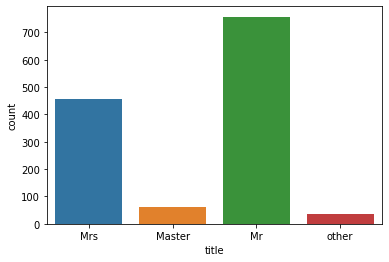

In [120]:
g = sns.countplot(df.select('title').toPandas().squeeze())

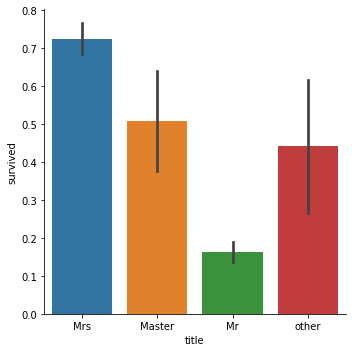

In [121]:
g = sns.catplot(x='title',y='survived',data=df.toPandas(),kind="bar")

In [122]:
df.printSchema()

root
 |-- pclass: string (nullable = false)
 |-- survived: integer (nullable = true)
 |-- sex: string (nullable = false)
 |-- age: double (nullable = false)
 |-- sibsp: integer (nullable = true)
 |-- parch: integer (nullable = true)
 |-- embarked: string (nullable = false)
 |-- home_dest: string (nullable = false)
 |-- train: boolean (nullable = false)
 |-- log_fare: double (nullable = false)
 |-- title: string (nullable = true)



In [123]:
# Tamaño de familia
df = df.withColumn('family_size', df['parch'] + df['sibsp'] + 1)
df.select('parch', 'sibsp', 'family_size').show(10)

+-----+-----+-----------+
|parch|sibsp|family_size|
+-----+-----+-----------+
|    0|    0|          1|
|    2|    1|          4|
|    2|    1|          4|
|    2|    1|          4|
|    2|    1|          4|
|    0|    0|          1|
|    0|    1|          2|
|    0|    0|          1|
|    0|    2|          3|
|    0|    0|          1|
+-----+-----+-----------+
only showing top 10 rows



In [124]:
df = df.withColumn('family_single', when(df['family_size'] == 1, 1).otherwise(0))
df = df.withColumn('family_small', when((df['family_size'] > 1) & (df['family_size'] <= 4), 1).otherwise(0))
df = df.withColumn('family_large', when(df['family_size'] > 4, 1).otherwise(0))
df.select('family_size', 'family_single', 'family_small', 'family_large').show(10)
df = df.drop('family_size')

+-----------+-------------+------------+------------+
|family_size|family_single|family_small|family_large|
+-----------+-------------+------------+------------+
|          1|            1|           0|           0|
|          4|            0|           1|           0|
|          4|            0|           1|           0|
|          4|            0|           1|           0|
|          4|            0|           1|           0|
|          1|            1|           0|           0|
|          2|            0|           1|           0|
|          1|            1|           0|           0|
|          3|            0|           1|           0|
|          1|            1|           0|           0|
+-----------+-------------+------------+------------+
only showing top 10 rows



In [125]:
df.columns

['pclass',
 'survived',
 'sex',
 'age',
 'sibsp',
 'parch',
 'embarked',
 'home_dest',
 'train',
 'log_fare',
 'title',
 'family_single',
 'family_small',
 'family_large']

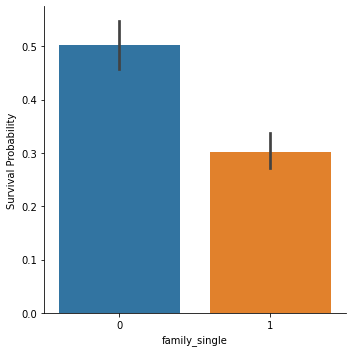

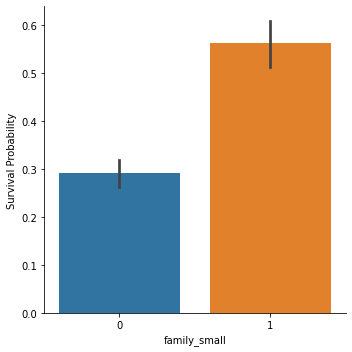

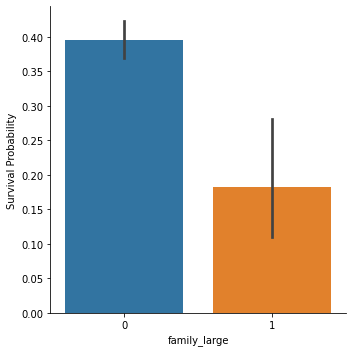

In [126]:
for fsize in ['single', 'small', 'large']:
    g = sns.catplot(x=f'family_{fsize}',y='survived',data=df.toPandas(),kind="bar")
    g = g.set_ylabels("Survival Probability")

## Ejercicio 6: Fitteo de regresión logistica

In [127]:
# Data sintetica
df1 = spark.createDataFrame([
    (1, 10.1, 'a', 'i'),
    (0, 14.3, 'b', 'x'),
    (0, 3.0, 'c', 'iv'),
    (1, 2.5, 'c', 'iv'),
    (1, 5.4, 'b', 'i'),
    (0, 9.7, 'a', 'x')
], ['target', 'numerical', 'cat1', 'cat2'])
df1.show()

# Convertir strings en numericos
from pyspark.ml.feature import StringIndexer

cat_cols = ['cat1', 'cat2']
for cat in cat_cols:
    cat_suff = f'{cat}_num'
    if cat_suff not in df1.columns:
        indexer = StringIndexer(inputCol=cat, outputCol=cat_suff).fit(df1)
        df1 = indexer.transform(df1)
df1.show()

# Hacer OneHotEnconding
from pyspark.ml.feature import OneHotEncoderEstimator

encoder = OneHotEncoderEstimator(inputCols=['cat1_num', 'cat2_num'], outputCols=['cat1_vec', 'cat2_vec'])
ohem = encoder.fit(df1)
df1 = ohem.transform(df1)
df1.show()

# Armar columna de features
df1 = df1.select('target','numerical', 'cat1_vec', 'cat2_vec')
df1.show()
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(inputCols=[c for c in df1.columns if c != 'target'], outputCol='features')
assembler.transform(df1).show()

+------+---------+----+----+
|target|numerical|cat1|cat2|
+------+---------+----+----+
|     1|     10.1|   a|   i|
|     0|     14.3|   b|   x|
|     0|      3.0|   c|  iv|
|     1|      2.5|   c|  iv|
|     1|      5.4|   b|   i|
|     0|      9.7|   a|   x|
+------+---------+----+----+

+------+---------+----+----+--------+--------+
|target|numerical|cat1|cat2|cat1_num|cat2_num|
+------+---------+----+----+--------+--------+
|     1|     10.1|   a|   i|     1.0|     1.0|
|     0|     14.3|   b|   x|     0.0|     0.0|
|     0|      3.0|   c|  iv|     2.0|     2.0|
|     1|      2.5|   c|  iv|     2.0|     2.0|
|     1|      5.4|   b|   i|     0.0|     1.0|
|     0|      9.7|   a|   x|     1.0|     0.0|
+------+---------+----+----+--------+--------+

+------+---------+----+----+--------+--------+-------------+-------------+
|target|numerical|cat1|cat2|cat1_num|cat2_num|     cat1_vec|     cat2_vec|
+------+---------+----+----+--------+--------+-------------+-------------+
|     1|     

In [128]:
num_cols = _get_typed_cols(df, col_type='num')
cat_cols = _get_typed_cols(df, col_type='cat')
df.columns, cat_cols, num_cols

(['pclass',
  'survived',
  'sex',
  'age',
  'sibsp',
  'parch',
  'embarked',
  'home_dest',
  'train',
  'log_fare',
  'title',
  'family_single',
  'family_small',
  'family_large'],
 ['pclass', 'sex', 'embarked', 'home_dest', 'title'],
 ['age',
  'sibsp',
  'parch',
  'log_fare',
  'family_single',
  'family_small',
  'family_large'])

In [129]:
cat_cols

['pclass', 'sex', 'embarked', 'home_dest', 'title']

In [130]:
from pyspark.ml.feature import StringIndexer

def _encode_categorical(df):
    cat_cols = _get_typed_cols(df, col_type='cat')
    logger.info(f"Categorical columns:\n {cat_cols}")
    encoded_cols = []
    for cat in cat_cols:
        cat_suff = f'{cat}_num'
        encoded_cols.append(cat_suff)
        if cat_suff not in df.columns:
            indexer = StringIndexer(inputCol=cat, outputCol=cat_suff).fit(df)
            df = indexer.transform(df)
    return df, encoded_cols

In [131]:
df, encoded_cols = _encode_categorical(df)
df.show()

2022-10-25 20:53:27,271-__main__-INFO: Categorical columns:
 ['pclass', 'sex', 'embarked', 'home_dest', 'title']


+------+--------+------+----+-----+-----+--------+--------------------+-----+------------------+------+-------------+------------+------------+----------+-------+------------+-------------+---------+
|pclass|survived|   sex| age|sibsp|parch|embarked|           home_dest|train|          log_fare| title|family_single|family_small|family_large|pclass_num|sex_num|embarked_num|home_dest_num|title_num|
+------+--------+------+----+-----+-----+--------+--------------------+-----+------------------+------+-------------+------------+------------+----------+-------+------------+-------------+---------+
|     1|       1|female|29.0|    0|    0|       S|        St Louis, MO| true|  5.35817698994543|   Mrs|            1|           0|           0|       1.0|    1.0|         0.0|         23.0|      1.0|
|     1|       1|  male|0.92|    1|    2|       S|Montreal, PQ / Ch...| true| 5.027492411162679|Master|            0|           1|           0|       1.0|    0.0|         0.0|         36.0|      2.0|


In [132]:
feature_cols = num_cols + encoded_cols
feature_cols

['age',
 'sibsp',
 'parch',
 'log_fare',
 'family_single',
 'family_small',
 'family_large',
 'pclass_num',
 'sex_num',
 'embarked_num',
 'home_dest_num',
 'title_num']

In [133]:
from pyspark.ml.feature import OneHotEncoderEstimator

ohe_cols = [f'{c}_vec' for c in encoded_cols]
encoder = OneHotEncoderEstimator(inputCols=encoded_cols, outputCols=ohe_cols)
ohem = encoder.fit(df)
df = ohem.transform(df)
df.show()
feature_cols = num_cols + ohe_cols

+------+--------+------+----+-----+-----+--------+--------------------+-----+------------------+------+-------------+------------+------------+----------+-------+------------+-------------+---------+--------------+-------------+-------------+-----------------+----------------+
|pclass|survived|   sex| age|sibsp|parch|embarked|           home_dest|train|          log_fare| title|family_single|family_small|family_large|pclass_num|sex_num|embarked_num|home_dest_num|title_num|pclass_num_vec|title_num_vec|  sex_num_vec|home_dest_num_vec|embarked_num_vec|
+------+--------+------+----+-----+-----+--------+--------------------+-----+------------------+------+-------------+------------+------------+----------+-------+------------+-------------+---------+--------------+-------------+-------------+-----------------+----------------+
|     1|       1|female|29.0|    0|    0|       S|        St Louis, MO| true|  5.35817698994543|   Mrs|            1|           0|           0|       1.0|    1.0|    

In [134]:
df.printSchema()

root
 |-- pclass: string (nullable = false)
 |-- survived: integer (nullable = true)
 |-- sex: string (nullable = false)
 |-- age: double (nullable = false)
 |-- sibsp: integer (nullable = true)
 |-- parch: integer (nullable = true)
 |-- embarked: string (nullable = false)
 |-- home_dest: string (nullable = false)
 |-- train: boolean (nullable = false)
 |-- log_fare: double (nullable = false)
 |-- title: string (nullable = true)
 |-- family_single: integer (nullable = false)
 |-- family_small: integer (nullable = false)
 |-- family_large: integer (nullable = false)
 |-- pclass_num: double (nullable = false)
 |-- sex_num: double (nullable = false)
 |-- embarked_num: double (nullable = false)
 |-- home_dest_num: double (nullable = false)
 |-- title_num: double (nullable = false)
 |-- pclass_num_vec: vector (nullable = true)
 |-- title_num_vec: vector (nullable = true)
 |-- sex_num_vec: vector (nullable = true)
 |-- home_dest_num_vec: vector (nullable = true)
 |-- embarked_num_vec: vector

In [135]:
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(inputCols=feature_cols, outputCol='features')
df = assembler.transform(df)
df.select('features').show()

+--------------------+
|            features|
+--------------------+
|(383,[0,3,4,8,10,...|
|(383,[0,1,2,3,5,8...|
|(383,[0,1,2,3,5,8...|
|(383,[0,1,2,3,5,8...|
|(383,[0,1,2,3,5,8...|
|(383,[0,3,4,8,9,1...|
|(383,[0,1,3,5,8,1...|
|(383,[0,4,8,9,10,...|
|(383,[0,1,3,5,8,1...|
|(383,[0,3,4,8,9,1...|
|(383,[0,1,3,5,8,9...|
|(383,[0,1,3,5,8,1...|
|(383,[0,3,4,8,11,...|
|(383,[0,3,4,8,10,...|
|(383,[0,3,4,8,9,1...|
|(383,[0,3,4,8,9,1...|
|(383,[0,2,3,5,8,9...|
|(383,[0,2,3,5,8,1...|
|(383,[0,3,4,8,11,...|
|(383,[0,3,4,8,9,1...|
+--------------------+
only showing top 20 rows



In [136]:
df.columns

['pclass',
 'survived',
 'sex',
 'age',
 'sibsp',
 'parch',
 'embarked',
 'home_dest',
 'train',
 'log_fare',
 'title',
 'family_single',
 'family_small',
 'family_large',
 'pclass_num',
 'sex_num',
 'embarked_num',
 'home_dest_num',
 'title_num',
 'pclass_num_vec',
 'title_num_vec',
 'sex_num_vec',
 'home_dest_num_vec',
 'embarked_num_vec',
 'features']

In [137]:
df.select('train').take(2)

[Row(train=True), Row(train=True)]

In [142]:
train_data = df.filter(f.col('train') == True).select('survived', 'features')
test_data = df.filter(f.col('train') == False).select('survived', 'features')
train_data.show(200)

+--------+--------------------+
|survived|            features|
+--------+--------------------+
|       1|(383,[0,3,4,8,10,...|
|       1|(383,[0,1,2,3,5,8...|
|       0|(383,[0,1,2,3,5,8...|
|       0|(383,[0,1,2,3,5,8...|
|       0|(383,[0,1,2,3,5,8...|
|       1|(383,[0,3,4,8,9,1...|
|       0|(383,[0,4,8,9,10,...|
|       1|(383,[0,1,3,5,8,1...|
|       0|(383,[0,3,4,8,9,1...|
|       0|(383,[0,1,3,5,8,9...|
|       1|(383,[0,3,4,8,11,...|
|       1|(383,[0,3,4,8,10,...|
|       1|(383,[0,2,3,5,8,1...|
|       1|(383,[0,1,2,3,5,8...|
|       1|(383,[0,3,4,8,9,1...|
|       1|(383,[0,3,4,8,11,...|
|       0|(383,[0,3,4,8,9,1...|
|       1|(383,[0,1,3,5,8,9...|
|       1|(383,[0,1,3,5,8,1...|
|       0|(383,[0,3,4,8,9,1...|
|       1|(383,[0,3,4,8,9,1...|
|       1|(383,[0,3,4,8,10,...|
|       1|(383,[0,3,4,8,10,...|
|       0|(383,[0,3,4,8,9,1...|
|       1|(383,[0,2,3,5,8,1...|
|       1|(383,[0,3,4,8,9,1...|
|       0|(383,[0,3,4,8,9,1...|
|       0|(383,[0,3,4,8,9,1...|
|       

In [291]:
from pyspark.ml.classification import LogisticRegression

lr = LogisticRegression(labelCol='survived', featuresCol='features')
lrm = lr.fit(train_data)

In [292]:
dir(lrm.summary)

['__class__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_call_java',
 '_create_from_java_class',
 '_java_obj',
 '_new_java_array',
 '_new_java_obj',
 'accuracy',
 'areaUnderROC',
 'fMeasureByLabel',
 'fMeasureByThreshold',
 'falsePositiveRateByLabel',
 'featuresCol',
 'labelCol',
 'labels',
 'objectiveHistory',
 'pr',
 'precisionByLabel',
 'precisionByThreshold',
 'predictionCol',
 'predictions',
 'probabilityCol',
 'recallByLabel',
 'recallByThreshold',
 'roc',
 'totalIterations',
 'truePositiveRateByLabel',
 'weightedFMeasure',
 'weightedFalsePositiveRate',
 'weightedPrecision',
 'weightedRecall',
 'weightedTruePositiveRate']

In [293]:
# Metricas de evaluacion (insample)
lrm.summary.accuracy, lrm.summary.areaUnderROC

(0.8871331828442438, 0.9511851273911055)

In [294]:
pred_df = lrm.transform(test_data)
pred_df.show()

+--------+--------------------+--------------------+--------------------+----------+
|survived|            features|       rawPrediction|         probability|prediction|
+--------+--------------------+--------------------+--------------------+----------+
|       1|(383,[0,1,3,5,8,1...|[-18.850897098301...|[6.50368365245305...|       1.0|
|       1|(383,[0,1,3,5,8,1...|[-3.9969299228548...|[0.01804051615346...|       1.0|
|       1|(383,[0,3,4,8,9,1...|[-3.0707025685637...|[0.04433205253147...|       1.0|
|       0|(383,[0,3,4,8,9,1...|[0.03474012319249...|[0.50868415742381...|       0.0|
|       0|(383,[0,2,3,5,8,9...|[-0.3181998978026...|[0.42111450908398...|       1.0|
|       1|(383,[0,3,4,8,11,...|[-3.6869620142149...|[0.02443591170783...|       1.0|
|       0|(383,[0,3,4,8,9,1...|[-5.4026747903180...|[0.00448431650195...|       1.0|
|       1|(383,[0,1,2,3,5,8...|[-2.0344342851231...|[0.11563468396967...|       1.0|
|       1|(383,[0,3,4,8,10,...|[-2.6522321677764...|[0.0658515642

In [295]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

evaluator = BinaryClassificationEvaluator(labelCol='survived')
evaluator.evaluate(pred_df)

0.6943967981703839

## Ejercicio 7: árboles

In [ ]:
from pyspark.ml.classification import DecisionTreeClassifier

dt = DecisionTreeClassifier(labelCol='survived', featuresCol='features')
dtm = dt.fit(train_data)

In [ ]:
pred_df = dtm.transform(test_data)
pred_df.show()

In [ ]:
evaluator.evaluate(pred_df)

In [ ]:
from pyspark.ml.classification import RandomForestClassifier

rf = RandomForestClassifier(labelCol='survived', featuresCol='features')
rfm = rf.fit(train_data)
pred_df = rfm.transform(test_data)
pred_df.show()

In [ ]:
evaluator.evaluate(pred_df)

In [ ]:
dir(rfm)

In [ ]:
rfm.featureImportances

In [ ]:
from itertools import chain
attrs = sorted(
    (attr['idx'], attr['name'])
    for attr in (
        chain(*pred_df.schema['features'].metadata['ml_attr']['attrs'].values())
    )
)
feat_import = [(name, rfm.featureImportances[idx]) for idx, name in attrs if rfm.featureImportances[idx]]
feat_import = pd.DataFrame(feat_import, columns=['feature', 'importance']).sort_values(by='importance', ascending=False)
feat_import.head(15)

In [ ]:
ax = feat_import[:20].plot(kind='bar')
ax.set_xticklabels(feat_import[:20]['feature'].tolist())

In [143]:
spark.stop()